In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dados\Iris.csv")

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Tiago Gomes\AppData\Local\Temp\ipykernel_4160\2039190784.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("dados\Iris.csv")


In [4]:
# Obtendo a forma do conjunto de dados
df.shape

(150, 6)

In [5]:
# Análise exploratoria as colunas e tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Renomeando as colunas para português
df.columns = ['id', 'comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'especie']

In [9]:
# Análise estática dos dados
df.describe()

,id,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Verificando se possui valores nulos
df.isnull().sum()

id                    0
comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
especie               0
dtype: int64

In [11]:
#Verificando as especies individuais 
data = df.drop_duplicates(subset=['especie'])
data

,id,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,especie
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [16]:
# Total de flores por espécie
df.value_counts(subset=['especie'])

especie        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

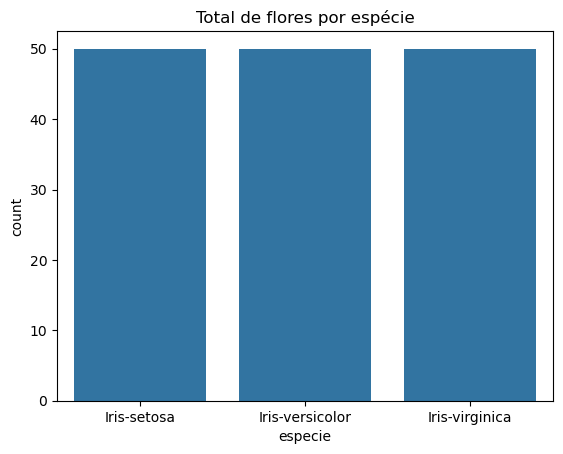

In [ ]:
# Plotar um gráfico para melhor visualização
sns.countplot(x='especie', data=df)
plt.title('Total de flores por espécie')
plt.show()

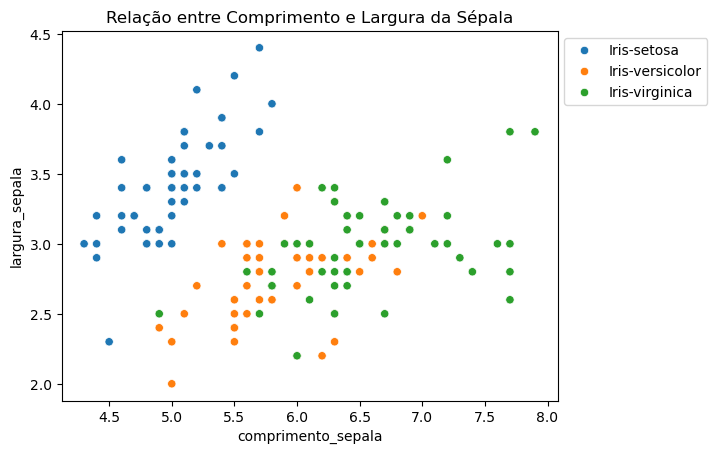

In [19]:
# Analisando relação entre comprimento e largura da sépala
sns.scatterplot(x='comprimento_sepala', y='largura_sepala', hue='especie', data=df)
plt.title('Relação entre Comprimento e Largura da Sépala')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

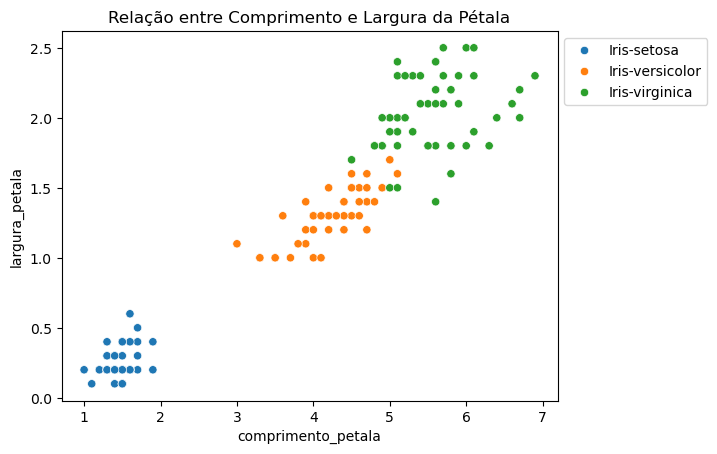

In [20]:
# Analisando a relação entre comprimento e largura da pétala
sns.scatterplot(x='comprimento_petala', y='largura_petala', hue='especie', data=df)
plt.title('Relação entre Comprimento e Largura da Pétala')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

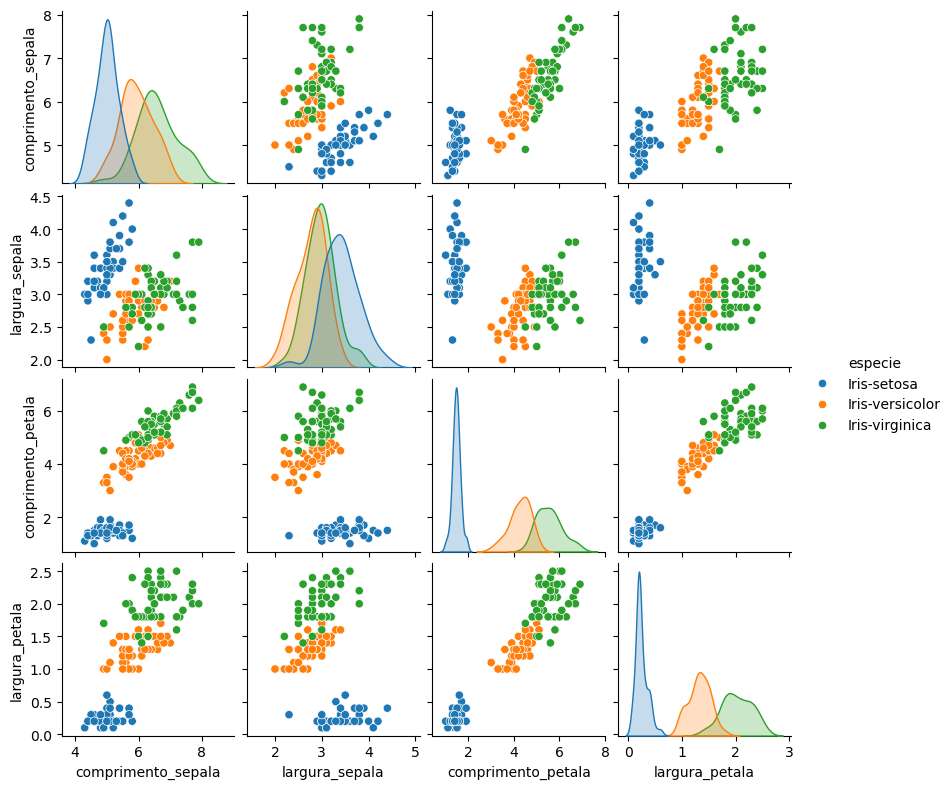

In [21]:
# Representando todos os relacionamentos entre as variáveis
sns.pairplot(df.drop(['id'], axis=1), hue='especie', height=2)

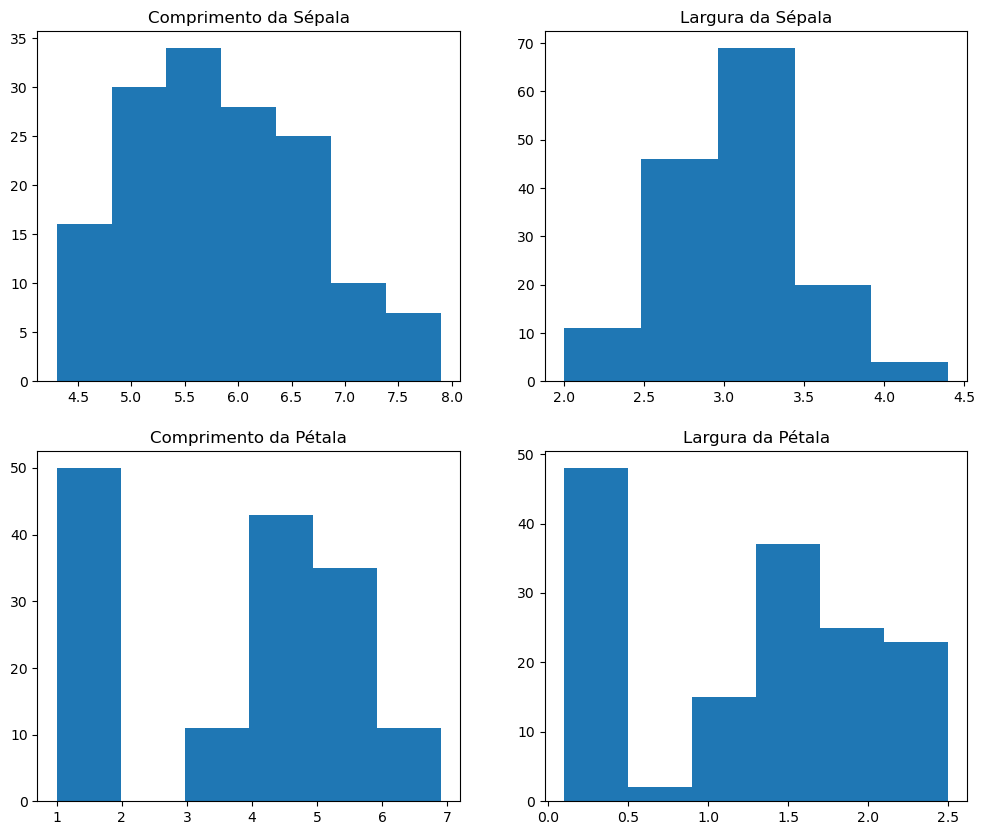

In [22]:
# Verificando a distribuição de cada variável
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].set_title('Comprimento da Sépala')
axes[0, 0].hist(df['comprimento_sepala'], bins=7)

axes[0, 1].set_title('Largura da Sépala')
axes[0, 1].hist(df['largura_sepala'], bins=5)

axes[1, 0].set_title('Comprimento da Pétala')
axes[1, 0].hist(df['comprimento_petala'], bins=6)

axes[1, 1].set_title('Largura da Pétala')
axes[1, 1].hist(df['largura_petala'], bins=6);

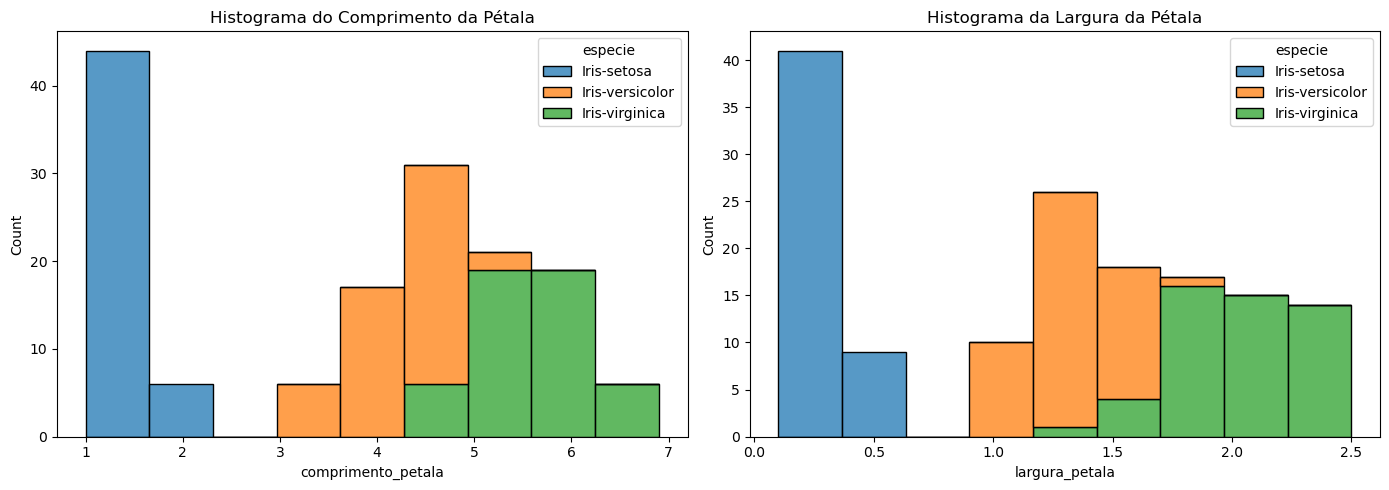

In [24]:
# Melhorando a visualização dos histogramas de comprimento e largura da pétala por espécie
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x='comprimento_petala', hue='especie', multiple='stack', ax=axes[0])
axes[0].set_title('Histograma do Comprimento da Pétala')

sns.histplot(data=df, x='largura_petala', hue='especie', multiple='stack', ax=axes[1])
axes[1].set_title('Histograma da Largura da Pétala')

plt.tight_layout()
plt.show()

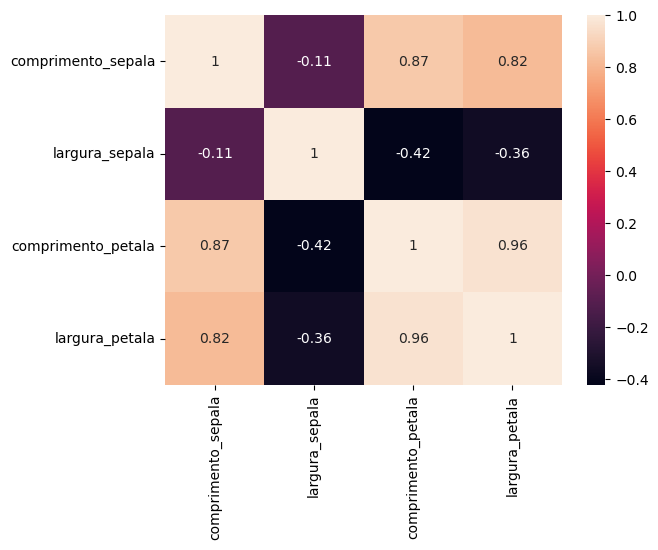

In [32]:
colunas = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala']

sns.heatmap(df[colunas].corr(method='pearson'), annot=True)

plt.show()

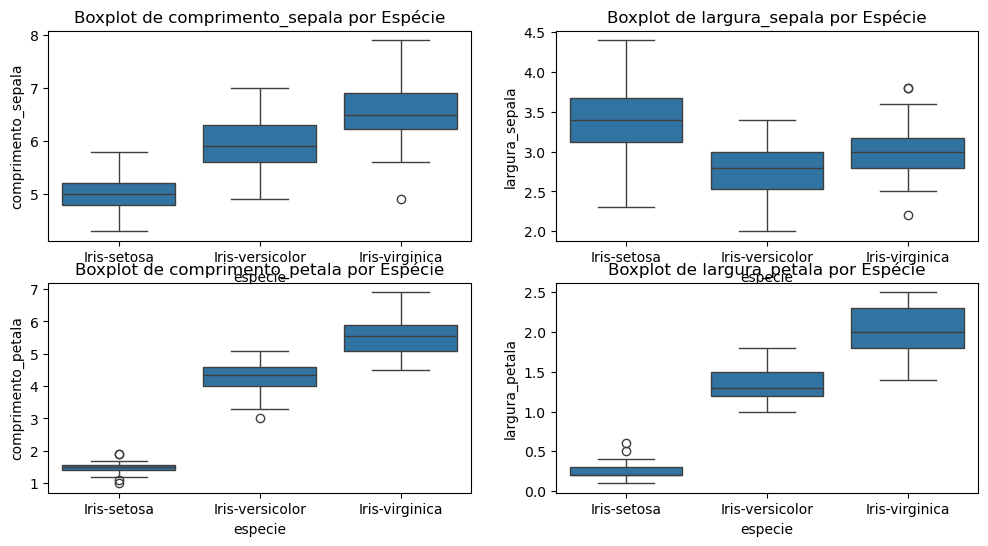

In [33]:
# Realizando o boxplot para verificar a distribuição dos dados
def grafico(y):
    sns.boxplot(x='especie', y=y, data=df)
    plt.title(f'Boxplot de {y} por Espécie')
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
grafico('comprimento_sepala')
plt.subplot(2, 2, 2)
grafico('largura_sepala')
plt.subplot(2, 2, 3)
grafico('comprimento_petala')
plt.subplot(2, 2, 4)
grafico('largura_petala')

plt.show()

## Resumo dos Resultados da Análise Exploratória

A análise exploratória realizada sobre o conjunto de dados Iris permitiu obter diversas informações importantes:

- **Estrutura dos Dados:** O dataset possui 150 amostras de flores, cada uma com medidas de sépala e pétala, além da espécie correspondente.
- **Verificação de Nulos:** Não foram encontrados valores nulos, indicando que o conjunto está completo para análise.
- **Distribuição das Espécies:** A contagem de flores por espécie está equilibrada, o que é ideal para análises comparativas.
- **Visualizações:** 
    - Gráficos de barras e histogramas mostraram a distribuição das espécies e das medidas das flores.
    - Gráficos de dispersão (scatterplots) evidenciaram relações entre comprimento e largura das sépalas e pétalas, destacando a separação entre as espécies.
    - O pairplot permitiu visualizar todos os relacionamentos entre as variáveis, reforçando a distinção entre as espécies.
    - O heatmap das correlações mostrou que as variáveis de pétala possuem forte correlação entre si.
    - Boxplots evidenciaram diferenças nas distribuições das medidas entre as espécies.
- **Conclusão:** As espécies de Iris apresentam características morfológicas distintas, principalmente nas medidas das pétalas, o que facilita a classificação automática dessas flores.
